In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


In [2]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='survived', ylabel='fare'>

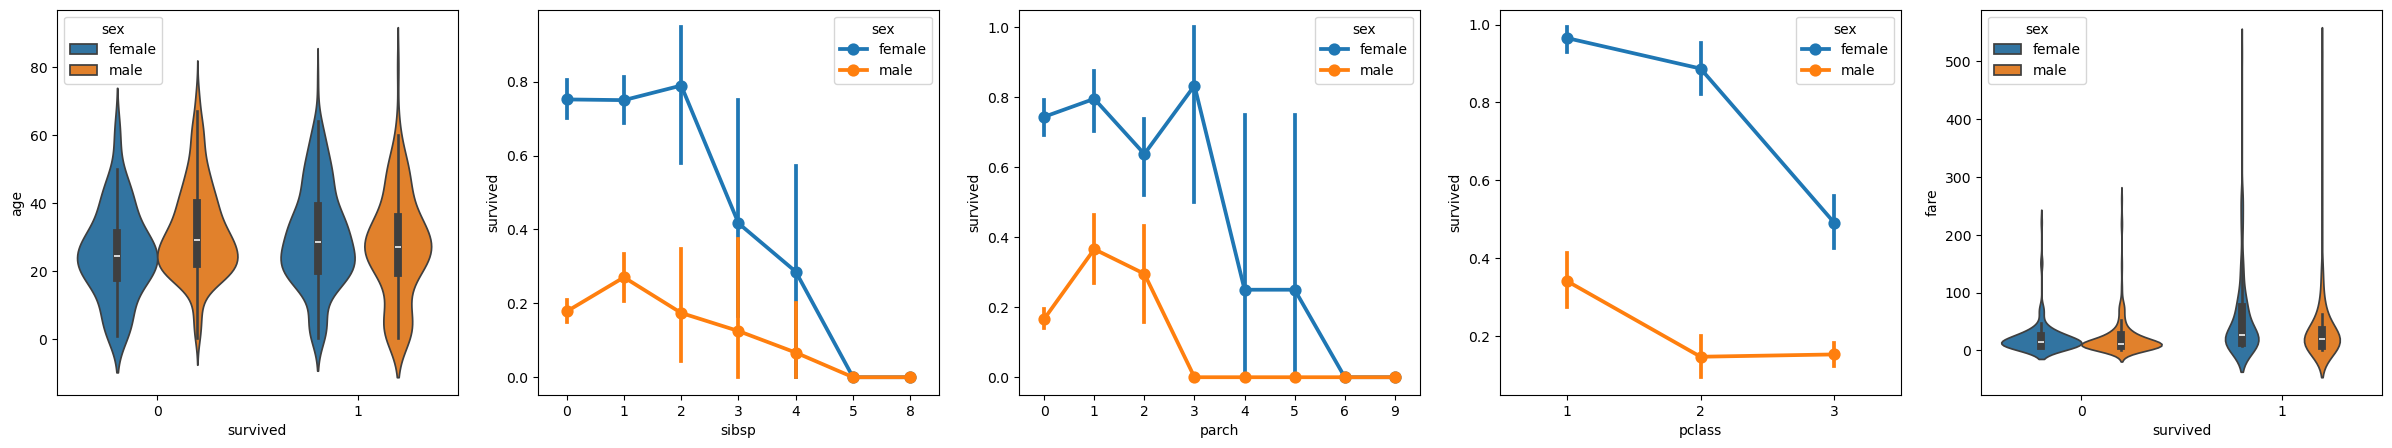

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


In [8]:
data.replace({'male': 1, 'female': 0}, inplace=True)


/var/folders/2v/klpfscnn6y95q6v006bnpn2r0000gn/T/ipykernel_9851/761646214.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [9]:
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [14]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.head(10)
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [16]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


# TRAINING

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


# NAIVE BAYES CLASSIFIER
`Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable`

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [20]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


# DENSE NEURAL NETWORK WITH 
- KERAS
- TENSORFLOW

In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


In [22]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
 1/27 [>.............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.2812

2025-01-25 18:16:42.047468: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


27/27 [==============================] - 0s 633us/step - loss: 0.6922 - accuracy: 0.5706
Epoch 2/50
27/27 [==============================] - 0s 566us/step - loss: 0.6892 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 530us/step - loss: 0.6835 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 483us/step - loss: 0.6726 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 437us/step - loss: 0.6549 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 470us/step - loss: 0.6347 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 453us/step - loss: 0.6121 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 430us/step - loss: 0.5936 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 465us/step - loss: 0.5818 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 467us/step - loss: 0.5744 - accuracy: 0.5861
Epoch 11/5

In [25]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))


7/7 [==============================] - 0s 458us/step
0.8133971291866029
